## DCGAN IMPLEMENTATION

In this notebook I will implement [DCGAN](https://arxiv.org/abs/1511.06434) and try to generate new Pokemon.

Dataset of original Pokemon was taken from [Kaggle](https://www.kaggle.com/datasets/kvpratama/pokemon-images-dataset)

In [67]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [72]:
# Let's take a look at the images first
import torch
import torchvision.transforms.functional as F
from torchvision import transforms
import torchvision.datasets as dset
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import numpy as np


#Loading the data
def get_dataloader(batch_size, image_size, data_dir, num_workers=0):
    """
    Function to load the data and transform it. Images are resized by image_size parameter
    """

    dataset = dset.ImageFolder(root=data_dir,
                        transform=transforms.Compose([
                        transforms.Resize(image_size),
                        transforms.CenterCrop(image_size),
                        transforms.ToTensor()
                    ]))

    dataloader = torch.utils.data.DataLoader(dataset=dataset,
                                            batch_size=batch_size,
                                            shuffle=True,
                                            num_workers=num_workers)

    return dataloader

def display_image(images):
    """
    Function to display dataloader batch
    """
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.title('Pokemon Images')
    plt.imshow(np.transpose(vutils.make_grid(images[0].to(device)[:64], padding=1, normalized=True).cpu(), (1,2,0)))


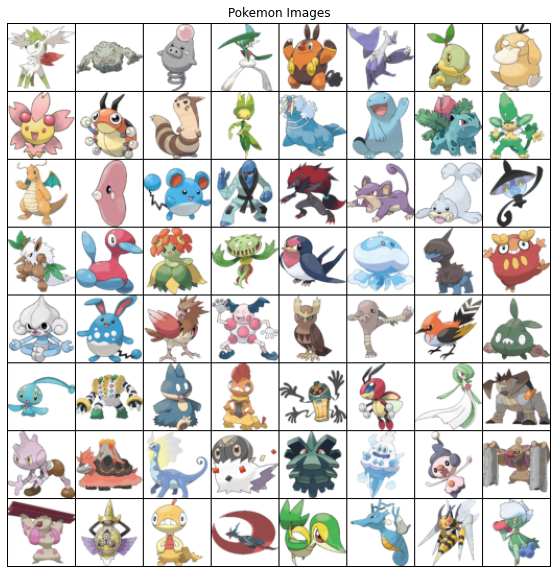

In [71]:
#Getting a data load and displaying first batch 
pokemon_loader = get_dataloader(128, 64, 'C:/Users/ultra/Python/AI_and_ML/GAN/DCGAN_Pokemon/dataset/pokemon_jpg/')
dataiter = next(iter(pokemon_loader))
display_image(dataiter)

